In [1]:
import os
import sys
import time
from datetime import datetime
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
jupyter_dir = os.path.abspath(str(Path()))
os.chdir(jupyter_dir)
from mlop import mlop
sys.path.append(os.path.join(jupyter_dir,'train_data'))
sys.path.append(os.path.join(
    jupyter_dir,
    'historical_data',
    'historical_generation'))
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.5f}'.format

train_start = time.time()
train_start_datetime = datetime.fromtimestamp(train_start)
train_start_tag = train_start_datetime.strftime('%c')

print("\n"+"#"*18+"\n# training start #\n"+
      "#"*18+"\n"+f"\n{train_start_tag}\n")


##################
# training start #
##################

Wed Oct  9 16:30:03 2024




pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual


importing dataset(s)...



loading: 100%|███████████████████████████████████████████████████████████████████████| 900/900 [00:16<00:00, 53.37it/s]



preparing data...


         spot_price  strike_price       barrier  days_to_maturity  \
count 4749637.00000 4749637.00000 4749637.00000     4749637.00000   
mean     1389.18293    1388.18348    1389.08912         330.32163   
min       871.84000     784.65600     435.92000          60.00000   
25%      1311.13000    1295.97398    1017.40925          90.00000   
50%      1406.77000    1395.46276    1381.08410         360.00000   
75%      1489.55000    1493.84510    1733.94810         540.00000   
max      1565.18000    1721.69800    2347.77000         720.00000   
std       126.25592     150.08237     449.10595         241.58142   

       barrier_price        rebate  dividend_rate  risk_free_rate  \
count  4749637.00000 4749637.00000  4749637.00000   4749637.00000   
mean        54.07644       0.00000        0.02082         0.04000   
min          0.00000       0.00000        0.01780         0.04000   
25%          2.59504       0.00000        0.01881         0.04000   
50%         

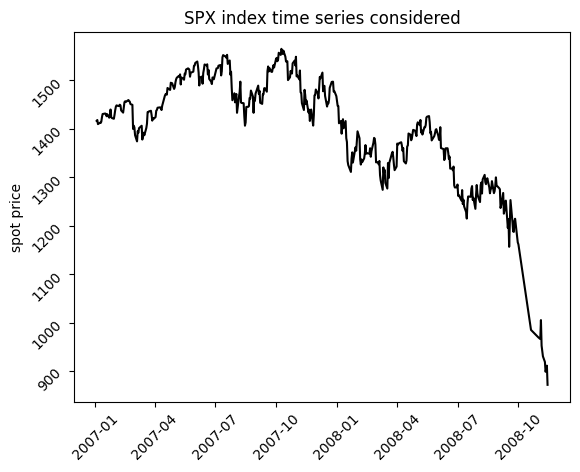

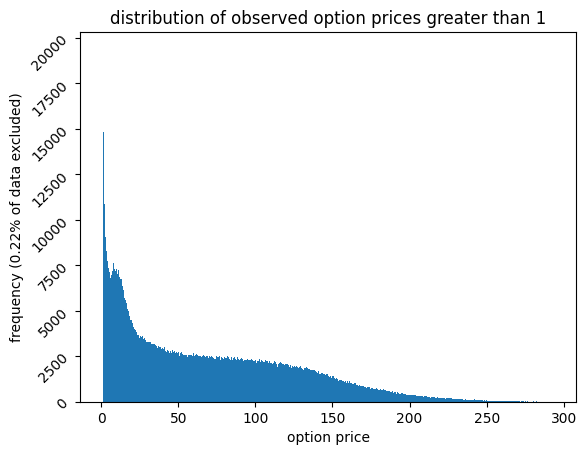

test size: 1.0%
random state: None
maximum iterations: 1000

target: 
observed_price

features: 
['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier', 'barrier_type_name', 'w']

feature transformer(s):
('StandardScaler', StandardScaler(), ['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier'])

('OneHotEncoder', OneHotEncoder(sparse_output=False), ['barrier_type_name', 'w'])

target transformer(s):
StandardScaler()



<Figure size 640x480 with 0 Axes>

In [2]:
from HDF_collection import contracts

dataset = contracts.copy()
mlop = mlop(user_dataset = dataset)

In [3]:
"""
manual filtering
"""
dataset = dataset[dataset['outin']=='Out']

# leave a space or other separator in front
file_tag_addon = " OnlyOuts"
pd.options.display.float_format = '{:.5f}'.format
dataset

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,updown,outin,w,barrier_type_name,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price
0,1416.59000,1274.93100,708.29500,60,0.48509,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.45812
1,1416.59000,1274.93100,881.82727,60,0.47965,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.51999
2,1416.59000,1274.93100,1055.35955,60,0.47592,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.46932
3,1416.59000,1274.93100,1228.89182,60,0.15441,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.00685
6,1416.59000,1345.76050,708.29500,60,4.32304,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,4.24493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749627,871.84000,959.02400,1307.76000,90,28.00646,Up,Out,call,UpOut,0.00000,0.03255,0.04000,0.12978,3.01256,-0.99969,0.29251,0.37980,2008-11-14,2009-02-12,28.00739
4749629,871.84000,959.02400,1307.76000,180,21.69505,Up,Out,call,UpOut,0.00000,0.03255,0.04000,0.12978,3.01256,-0.99969,0.29251,0.37980,2008-11-14,2009-05-13,21.68640
4749631,871.84000,959.02400,1307.76000,360,14.66752,Up,Out,call,UpOut,0.00000,0.03255,0.04000,0.12978,3.01256,-0.99969,0.29251,0.37980,2008-11-14,2009-11-09,14.72975
4749633,871.84000,959.02400,1307.76000,540,10.77427,Up,Out,call,UpOut,0.00000,0.03255,0.04000,0.12978,3.01256,-0.99969,0.29251,0.37980,2008-11-14,2010-05-08,10.58556


In [4]:
"""
random train/test split
"""
train_data, train_X, train_y, \
    test_data, test_X, test_y = mlop.split_user_data()
""""""

''

In [5]:
"""
manual train/test split
"""
unique_dates = dataset['calculation_date'].sort_values(
    ascending=True).unique().tolist()
filter_date = unique_dates[int(0.9*len(unique_dates))]

train_data = dataset[
    (
      # (dataset['calculation_date']>=datetime(2007,1,1))
      #  &
        (dataset['calculation_date']<=filter_date)
      )].copy()

test_data = dataset[
    (
      (dataset['calculation_date']>filter_date)
      # &
      # (dataset['calculation_date']<=datetime(2012,12,31))
      )].copy()



In [6]:
"""
preprocessing
"""
train_X, train_y, test_X, test_y = mlop.split_data_manually(
    train_data, test_data)
preprocessor = mlop.preprocess()
train_data.describe()

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price
count,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588.00000,2026588,2026588,2026588.00000
mean,1425.91592,1425.91592,1425.91921,324.91474,65.79462,0.00000,0.02013,0.04000,0.04822,2.13466,-0.96130,0.19828,0.04014,2007-12-02 05:36:58.214258944,2008-10-22 03:34:12.044125952,65.79637
min,1214.91000,1093.41900,607.45500,60.00000,0.00023,0.00000,0.01780,0.04000,0.01992,0.03970,-1.00000,0.08818,0.00524,2007-01-03 00:00:00,2007-03-04 00:00:00,0.00000
25%,1359.88000,1340.56192,1041.54725,90.00000,14.80258,0.00000,0.01866,0.04000,0.03824,1.13366,-1.00000,0.15360,0.02413,2007-08-03 00:00:00,2008-03-15 00:00:00,14.80634
50%,1445.28000,1423.72847,1430.50340,180.00000,53.32167,0.00000,0.01946,0.04000,0.05281,1.75118,-1.00000,0.17385,0.03853,2007-11-29 00:00:00,2008-09-22 00:00:00,53.31467
75%,1503.06000,1514.65547,1807.16235,540.00000,106.91546,0.00000,0.02163,0.04000,0.05665,2.27834,-1.00000,0.20080,0.05330,2008-04-08 00:00:00,2009-05-27 00:00:00,106.92030
max,1565.18000,1721.69800,2347.77000,720.00000,292.97177,0.00000,0.02406,0.04000,0.40505,12.32603,-0.27661,1.45769,0.13501,2008-08-12 00:00:00,2010-08-02 00:00:00,292.82875
std,86.90401,121.06792,459.21807,241.51366,56.90294,0.00000,0.00165,0.00000,0.01488,1.70650,0.13080,0.13061,0.01994,NaN,NaN,56.90108


In [7]:
print(f"\n{train_data.dtypes}")
test_train_ratio = test_data.describe(
    ).iloc[0,0]/train_data.describe().iloc[0,0]
print(f"\ntrain/test: {int(round((1-test_train_ratio)*100,0))}/"
      +str(int(round(test_train_ratio*100,0))))


spot_price                  float64
strike_price                float64
barrier                     float64
days_to_maturity              int64
barrier_price               float64
updown                       object
outin                        object
w                            object
barrier_type_name            object
rebate                      float64
dividend_rate               float64
risk_free_rate              float64
theta                       float64
kappa                       float64
rho                         float64
eta                         float64
v0                          float64
calculation_date     datetime64[ns]
expiration_date      datetime64[ns]
observed_price              float64
dtype: object

train/test: 83/17


In [8]:
model_fit, runtime, specs = mlop.run_dnn(preprocessor,train_X,train_y)
train_end = time.time()
train_runtime = train_end-train_start


training...

Deep Neural Network
hidden layers sizes: (13, 13, 13)
learning rate: constant
activation: relu
solver: sgd
alpha: 0.0001


In [9]:
test_data.describe()

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price
count,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164.00000,349164,349164,349164.00000
mean,1185.11180,1185.11180,1185.11180,325.00000,61.68386,0.00000,0.02461,0.04000,0.07137,4.87666,-0.81060,0.39620,0.11266,2008-09-18 12:35:24.590163712,2009-08-09 12:35:24.590163712,61.68618
min,871.84000,784.65600,435.92000,60.00000,0.00008,0.00000,0.02231,0.04000,0.05525,1.52114,-1.00000,0.16478,0.02683,2008-08-13 00:00:00,2008-10-12 00:00:00,0.00000
25%,1165.72000,1121.97184,863.12160,90.00000,12.33706,0.00000,0.02278,0.04000,0.05880,2.33282,-1.00000,0.17287,0.04064,2008-09-03 00:00:00,2008-12-19 00:00:00,12.34391
50%,1231.72000,1209.04488,1195.48440,270.00000,50.82869,0.00000,0.02357,0.04000,0.06219,3.47328,-0.99975,0.28088,0.06022,2008-09-12 00:00:00,2009-06-25 12:00:00,50.83952
75%,1267.76000,1285.93902,1477.75500,540.00000,101.21758,0.00000,0.02438,0.04000,0.06557,7.89337,-0.63469,0.39647,0.14821,2008-09-26 00:00:00,2010-03-06 00:00:00,101.20815
max,1299.97000,1429.96700,1949.95500,720.00000,248.25468,0.00000,0.03255,0.04000,0.13214,11.87783,-0.24433,1.52388,0.37980,2008-11-14 00:00:00,2010-11-04 00:00:00,248.45746
std,119.87078,138.82030,394.60021,241.50604,53.51662,0.00000,0.00273,0.00000,0.02387,3.10325,0.25606,0.32672,0.08981,NaN,NaN,53.51435


In [10]:
insample, outsample, errors = mlop.test_prediction_accuracy(
        model_fit,
        test_data,
        train_data
        )


in sample:
     RSME: 4.275308721656071
     MAE: 3.062717049613921

out of sample:
     RSME: 15.109635871756026
     MAE: 8.376259709507607


In [24]:
train_end_tag = str(datetime.fromtimestamp(
    train_end).strftime("%Y_%m_%d %H-%M-%S"))
file_tag = str(train_end_tag + " " + specs[0] + file_tag_addon)
os.chdir(os.path.join(jupyter_dir,'trained_models'))
files_dir = os.path.join(
    jupyter_dir,'trained_models','trained_models',
    file_tag)

if Path(files_dir).exists():
    pass
else:
    os.mkdir(files_dir)

file_dir = os.path.join(files_dir,file_tag)

S = np.sort(train_data['spot_price'].unique())
K = np.sort(train_data['strike_price'].unique())
T = np.sort(train_data['days_to_maturity'].unique())
W = np.sort(train_data['w'].unique())
n_calls = train_data[train_data['w']=='call'].shape[0]
n_puts = train_data[train_data['w']=='put'].shape[0]
insample.to_csv(f"{file_dir} insample.csv")
outsample.to_csv(f"{file_dir} outsample.csv")
joblib.dump(model_fit,str(f"{file_dir}.pkl"))
pd.set_option("display.max_columns",None)
with open(f'{file_dir}.txt', 'w') as file:
    file.write(train_start_tag)
    file.write(f"\nspot(s):\n{S}")
    file.write(f"\n\nstrikes:\n{K}\n")
    file.write(f"\nmaturities:\n{T}\n")
    file.write(f"\ntypes:\n{W}\n")
    try:
        file.write(f"\n{train_data['barrier_type_name'].unique()}")
    except Exception:
        pass
    file.write("")
    file.write(f"\nnumber of calls, puts:\n{n_calls},{n_puts}\n")
    file.write(f"\ntotal prices:\n{train_data.shape[0]}\n")
    for spec in specs:
        file.write(f"{spec}\n")
    file.write("#"*17+"\n# training data #\n"+"#"*17+
          f"\n{train_data.describe()}\n")
    file.write("#"*13+"\n# test data #\n"+"#"*13+
          f"\n{test_data.describe()}\n")
    file.write(f"\n{dataset.dtypes}")
    file.write(
        f"\nin sample results:"
        f"\n     RMSE: {errors['insample_RMSE']}"
        f"\n     MAE: {errors['insample_MAE']}\n"
        f"\nout of sample results:"
        f"\n     RMSE: {errors['outofsample_RMSE']}"
        f"\n     MAE: {errors['outofsample_MAE']}\n"
        )
    file.write("\nfeatures:\n")
    for feature in mlop.feature_set:
        file.write(f"     {feature}\n")
    file.write(f"\ntarget: {mlop.target_name}\n")
    file.write(f"\ncpu: {train_runtime}\n")
    file.write(datetime.fromtimestamp(train_end).strftime('%c'))